# GRU Sentiment Classifier

We are going to classify IMDB reviews by their sentiment with a *GRU*

#### Load dependencies

In [5]:
import keras
from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import SpatialDropout1D
from keras.layers import GRU
from keras.layers import Embedding
from keras.callbacks import ModelCheckpoint
import os
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

#### Set hyperparameters

In [6]:
output_dir = 'model_output/gru'

epochs = 4
batch_size =128

n_dim = 64
n_unique_words= 10000
max_review_length = 100
pad_type = trunc_type = 'pre'
drop_embed = 0.2

n_gru = 256
drop_gru = 0.2

#n_dense = 256
#dropout = 0.25

#### Load data

In [7]:
(x_train, y_train) , (x_valid, y_valid) = imdb.load_data(num_words=n_unique_words)

#### Preprocess data

In [8]:
x_train_1 = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)
x_valid_1 = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, 
                        truncating=trunc_type,value=0)

#### Design NN Architecture

In [9]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length))
model.add(SpatialDropout1D(drop_embed))
model.add(GRU(n_gru, dropout=drop_gru))
model.add(Dense(1, activation='sigmoid'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 64)           640000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 64)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 256)               246528    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 886,785
Trainable params: 886,785
Non-trainable params: 0
_________________________________________________________________


#### Configure model

In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model_checkpoint =  ModelCheckpoint(filepath=output_dir+"weights.{epoch:02d}.hdf5")

In [13]:
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

#### Train!

In [14]:
model.fit(x_train_1, y_train, batch_size=batch_size, epochs=epochs, verbose=1,
         validation_data=(x_valid_1,y_valid), callbacks=[model_checkpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 138s 6ms/step - loss: 0.5083 - acc: 0.7358 - val_loss: 0.3542 - val_acc: 0.8452
Epoch 2/4
25000/25000 [==============================] - 156s 6ms/step - loss: 0.3016 - acc: 0.8742 - val_loss: 0.3442 - val_acc: 0.8510
Epoch 3/4
25000/25000 [==============================] - 146s 6ms/step - loss: 0.2405 - acc: 0.9055 - val_loss: 0.3577 - val_acc: 0.8419
Epoch 4/4
25000/25000 [==============================] - 162s 6ms/step - loss: 0.2036 - acc: 0.9217 - val_loss: 0.3790 - val_acc: 0.8348


#### Evaluate

In [15]:
model.load_weights(output_dir+'weights.01.hdf5')

In [16]:
y_hat = model.predict_proba(x_valid_1)

In [17]:
y_hat[0]

array([0.57286793], dtype=float32)

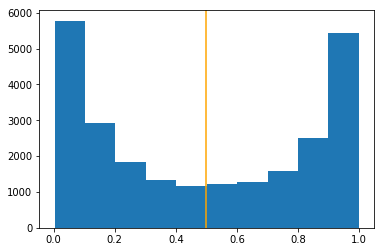

In [18]:
plt.hist(y_hat)
_ = plt.axvline(x=0.5, color='orange')

In [19]:
pct_auc = roc_auc_score(y_valid, y_hat)*100.0

In [20]:
"{:0.2f}".format(pct_auc)

'92.41'